In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
#read in median distances for pairwise interactions (obtained from analysis of the pdb)
directory='/Users/weilu/opt/gremlin/'
distancesCACB=pd.read_table(directory+'CACBmediandist.dat', delim_whitespace=True, header=None)
distancesCACA=pd.read_table(directory+'CACAmediandist.dat', delim_whitespace=True, header=None)
distancesCBCB=pd.read_table(directory+'CBCBmediandist.dat', delim_whitespace=True, header=None)
distancesCACB.columns = ['i', 'j', 'dist']
distancesCACA.columns = ['i', 'j', 'dist']
distancesCBCB.columns = ['i', 'j', 'dist']
#if you want to filter the gremlin data, adjust the parameters below
filter_threshold=0.5
column=4
name='raptorX.5.'

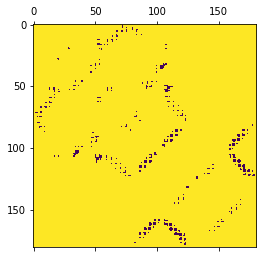

In [3]:
pdbIDs=['2xov']
for pdbID in pdbIDs:
    #make sure that there is a sequence file for the protein and the downloaded gremlin data in the proper directories
    #read and parse raptorX contact prediction data
    directory = "/Users/weilu/opt/gremlin/protein/" + pdbID + "/"
    raptorX_file=directory+"raptor." + pdbID + ".dat"
    count=0
    pairs=[]
    seq=''
    with open(raptorX_file) as f:
        for line in f:
            count+=1
            if count<6:
                continue
            elif line.split()[0]!='END' and len(line.split())==5:
                pairs.append(line.split())
            elif len(pairs)==0:
                seq+=line.split()[0]
    n=len(seq)
#     print(n)
    rnative_matrixCACB=np.ones([n,n])*99
    rnative_matrixCACA=np.ones([n,n])*99
    rnative_matrixCBCB=np.ones([n,n])*99
    for pair in pairs:
        i=int(pair[0])
        j=int(pair[1])
        irestype=seq[i-1]
        jrestype=seq[j-1]
        if float(pair[column]) > filter_threshold:
            if sum((distancesCACB['i']==irestype)&(distancesCACB['j']==jrestype))>0: #check if pair is in correct order
                well_centerCACB = distancesCACB[(distancesCACB['i']==irestype)&(distancesCACB['j']==jrestype)]['dist'].values[0]
                well_centerCACA = distancesCACA[(distancesCACA['i']==irestype)&(distancesCACA['j']==jrestype)]['dist'].values[0]
                well_centerCBCB = distancesCBCB[(distancesCBCB['i']==irestype)&(distancesCBCB['j']==jrestype)]['dist'].values[0]            
            else:
                well_centerCACB = distancesCACB[(distancesCACB['i']==jrestype)&(distancesCACB['j']==irestype)]['dist'].values[0]
                well_centerCACA = distancesCACA[(distancesCACA['i']==jrestype)&(distancesCACA['j']==irestype)]['dist'].values[0]
                well_centerCBCB = distancesCBCB[(distancesCBCB['i']==jrestype)&(distancesCBCB['j']==irestype)]['dist'].values[0]

            rnative_matrixCACB[i-1, j-1] = well_centerCACB
            rnative_matrixCACB[j-1, i-1] = well_centerCACB
            rnative_matrixCACA[i-1, j-1] = well_centerCACA
            rnative_matrixCACA[j-1, i-1] = well_centerCACA
            rnative_matrixCBCB[i-1, j-1] = well_centerCBCB
            rnative_matrixCBCB[j-1, i-1] = well_centerCBCB

    plt.matshow(rnative_matrixCACB)
    directory = "/Users/weilu/opt/gremlin/protein/" + pdbID + "/raptor/" 
    os.system("mkdir " + directory)
    np.savetxt(directory + 'go_rnativeCACB.dat', rnative_matrixCACB, fmt='%10.5f')
    np.savetxt(directory + 'go_rnativeCACA.dat', rnative_matrixCACA, fmt='%10.5f')
    np.savetxt(directory + 'go_rnativeCBCB.dat', rnative_matrixCBCB, fmt='%10.5f')